In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:
nami = pd.read_json('../tsunamilab/pois')

In [3]:
ewave = pd.read_csv('../easyWave/eWave.poi.ssh_b', delim_whitespace=True)
ewave.head()

,Minute,21414,21419,21401,21418,21413,52403,52406,55012,51425,...,46404,46407,46411,46412,43412,43413,32411,32412,32413,32401
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]
skipBuoys = [32401, 32413, 43413, 52406, 21401, 21419, 21414]

DARTs = [dart for dart in DARTs if dart not in skipBuoys]

In [5]:
darts = {}

for dart in DARTs:
#     print(dart)
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [40]:
ranges = {
    21418: 0,
    21413: 1200,
    52403: 1300,
    55012: 1000,
    51425: 800,
    51407: 800,
    46404: 900,
    46407: 800,
    46411: 800,
    46412: 700,
    43412: 550,
    32411: 1100,
    32412: 175,
    32413: 260,
    32401: 100
}

In [41]:
nami.columns

Int64Index([32401, 32412, 32413], dtype='int64')

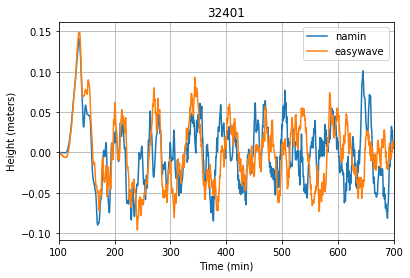

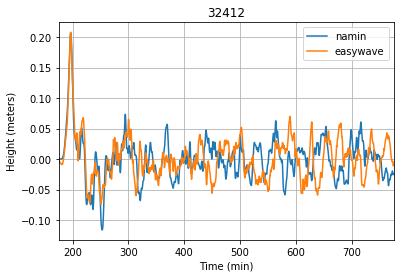

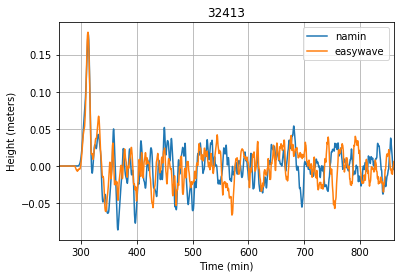

In [43]:
# [32412,
#                     43412,
#                     46412,
#                     46407,
#                     46404,
#                     51425,
#                     55012,
#                     52403,
#                     21413]
for dart_number in [32401, 32412, 32413]:
    plt.plot(np.array(nami[dart_number].time)/60, nami[dart_number].surface,label='namin')

    plt.plot(ewave['Minute'], ewave[str(dart_number)],label='easywave')
#     plt.plot(darts[dart_number][:,0]*60*24, darts[dart_number][:,1],'.', label='dart buoy', ms=2, c='k')

    plt.legend(loc=0)
    plt.xlim(ranges[dart_number], ranges[dart_number]+10*60)
    plt.title(dart_number)
    plt.xlabel('Time (min)')
    plt.ylabel('Height (meters)')
    plt.grid('on')
    plt.show()
